In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('Heart Attack.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


Source : https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset/data


--- 
- **Impulse** : Heart beat rate (bpm)

- **pressurehigh & pressurelow** : measurement of blood pressure. high<120 and low < 80 is considered healthy. (millimeters of mercury)

- **glucose** : sugar level (mg/dL) 1dL = 0.1L

- **kcm** : an enzyme that is found primarily in heart muscle cells. Higher levels of CK-MB may mean that you have had a heart attack or have other heart problems. (ng/mL)

- **troponin** : a protein that's found in the cells of your heart muscle. Very high levels of troponin are a sign that a heart attack has occurred. (nano gram/mL)

--- 

In [16]:
mapping = {'positive': 1, 'negative': 0}
df['class'] = df['class'].map(mapping)

In [17]:
X = df.drop(columns=['class']).to_numpy()
y = df['class'].to_numpy()

# Scaling Data

In [18]:
def scale(x):
    return (x - x.mean())/(max(x) - min(x))

In [19]:
x1 = scale(X[:, 0]).reshape(-1, 1)
x2 = scale(X[:, 1]).reshape(-1, 1)
x3 = scale(X[:, 2]).reshape(-1, 1)
x4 = scale(X[:, 3]).reshape(-1, 1)
x5 = scale(X[:, 4]).reshape(-1, 1)
x6 = scale(X[:, 5]).reshape(-1, 1)
x7 = scale(X[:, 6]).reshape(-1, 1)
x8 = scale(X[:, 7]).reshape(-1, 1)

In [20]:
X = np.concatenate((x1, x2, x2, x4, x5, x6, x7, x8), axis=1)

# Spliting Data

In [22]:
# Split X into Train and Test Set
rows = int(0.8 * X.shape[0])
np.random.seed(42)
np.random.shuffle([X, y])

X_train, X_test = X[: rows], X[rows: ]
y_train, y_test = y[: rows], y[rows: ]

# Building the Model

hypothesis : $h(z) = \dfrac{1}{1 + e^{-z}}$ where $z = w_1 x_1 + w_2x_2 +  ... + b$

cost function : $J(w, b) = -\dfrac{1}{m} \sum\limits_{i=1}^m [y^i \log(h(x^i)) + (1 - y^i)\log(1 - h(x^i))]$

In [23]:
def hyp(X, w, b):
    return 1 / (1 + np.exp(-(np.dot(X, w) + b)))

def costfunc(X, w, b, y):
    m = X.shape[0]
    J = np.sum(-y * np.log(hyp(X, w, b)) - (1 - y) * np.log(1 - hyp(X, w, b)))
    return J / m

def grad(X, w, b, y):
    m, n = X.shape
    dw = np.zeros(n)
    db = 0

    for i in range(m):
        z = hyp(X[i], w, b)
        error = z - y[i]
        dw += error * X[i]
        db += error
    dw = 2* (dw / m)
    db = 2* (db / m)
    return dw, db

$\dfrac{\partial J}{dw} = \dfrac{2}{m} \sum\limits_{i=1}^m (y_{pred} - y_i ) x_i$

$\dfrac{\partial J}{db} = \dfrac{2}{m} \sum\limits_{i=1}^m (y_{pred} - y_i )$

# Training

In [24]:
lr = 0.5
w = np.zeros(X_train.shape[1])
b = 0
cost = []
for i in range(15001):
    cost_val = costfunc(X_train, w, b, y_train)
    cost.append(cost_val)

    dw, db = grad(X_train, w, b, y_train)

    w = w - lr*dw
    b = b - lr*db

    if i%1000 == 0:
        print(f'Iteration {i}, cost = {cost_val}')

print(f'\nweights = {w}, bias = {b}')


Iteration 0, cost = 0.6931471805599453


Iteration 1000, cost = 0.5483260426958687
Iteration 2000, cost = 0.5265025979586163
Iteration 3000, cost = 0.5137005761870675
Iteration 4000, cost = 0.5048146922550854
Iteration 5000, cost = 0.498101659188698
Iteration 6000, cost = 0.4927603664650443
Iteration 7000, cost = 0.4883592246428546
Iteration 8000, cost = 0.48464032752506575
Iteration 9000, cost = 0.4814377556502975
Iteration 10000, cost = 0.47863869246409846
Iteration 11000, cost = 0.4761630543622554
Iteration 12000, cost = 0.4739520064639518
Iteration 13000, cost = 0.4719610922809563
Iteration 14000, cost = 0.4701559266830472
Iteration 15000, cost = 0.46850940335592317

weights = [ 3.50470787  0.18704583  0.18704583 -0.31515152 -0.16329491 -0.31240279
 30.10616902 25.28111477], bias = 1.9578391790243532


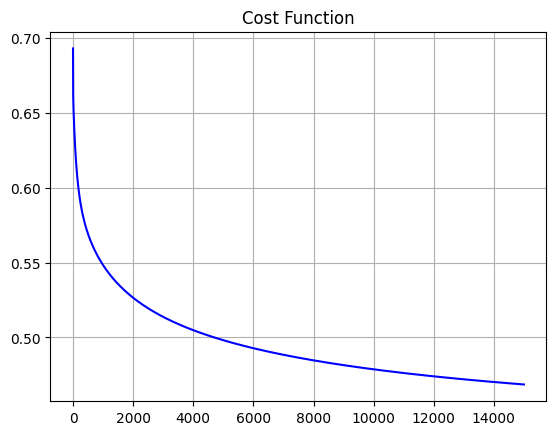

In [25]:
plt.plot(range(15001), cost, color='b')
plt.title("Cost Function")
plt.grid()
plt.show()

In [26]:
def predict(X, w, b):
    return (hyp(X, w, b) > 0.5).astype(int)

y_pred = predict(X_test, w, b)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

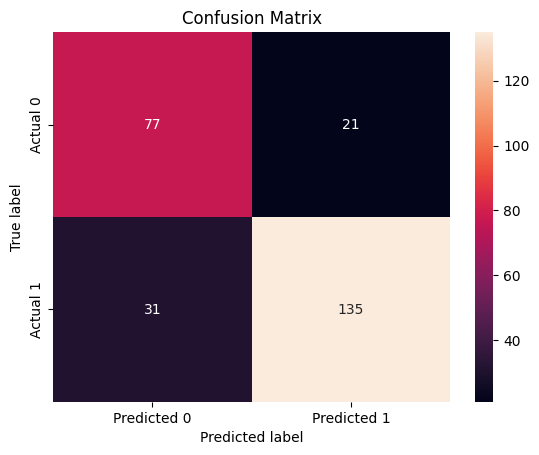

In [28]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [29]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        98
           1       0.87      0.81      0.84       166

    accuracy                           0.80       264
   macro avg       0.79      0.80      0.79       264
weighted avg       0.81      0.80      0.80       264



# Using Scikit-Learn Module

In [30]:
df = pd.read_csv('Heart Attack.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [31]:
mapping = {'positive': 1, 'negative': 0}
df['class'] = df['class'].map(mapping)

In [32]:
X = df.drop(columns=['class']).to_numpy()
y = df['class'].to_numpy()

In [33]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

X = scale.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test)

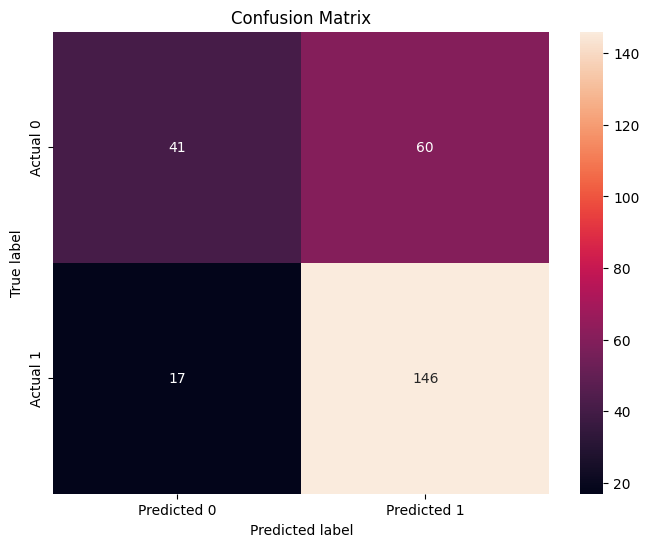

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.71      0.41      0.52       101
           1       0.71      0.90      0.79       163

    accuracy                           0.71       264
   macro avg       0.71      0.65      0.65       264
weighted avg       0.71      0.71      0.69       264

